# Import package

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score

# Load dataset

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final Tasks/loan_data_2007_2014.csv")

<ipython-input-109-95611d9402d2>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final Tasks/loan_data_2007_2014.csv")


#Exploring data

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [111]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [112]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 1. Check duplicate data

In [113]:
# There is no duplicate data in this dataset.
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Length: 466285, dtype: bool

# Defining Label

In [114]:
# Check target data (loan_status)
df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [115]:
#define values for bad and good loans
good =  ['Current', 'Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']

df['loan_ending'] = np.where(df['loan_status'].isin(good), 'good', 'bad')

<Axes: title={'center': 'Good and Bad Loans Balance'}>

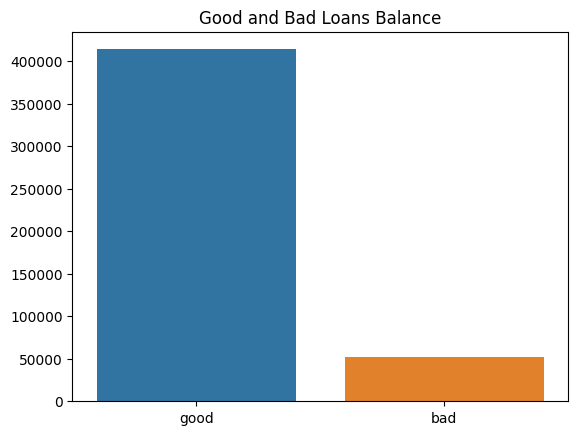

In [116]:
# Plot good and bad loans balance
plt.title('Good and Bad Loans Balance')
sns.barplot(x=df.loan_ending.value_counts().index,y=df.loan_ending.value_counts().values)

# Data Leakage
##### Data leakage is the unauthorized transmission of data from within an organization to an external destination or recipient. This is the data that we won't get when we use the model in deployment.

##### So, those columns that contain Data Leakage will be drop and only keep the column with data that can be obtained before the loan is invested in.

##### Columns related to the current status of the loan (after it is issued): 'issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d'

In [117]:
data_leakage = ['issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d']
df.drop(columns=data_leakage, axis=1, inplace=True)

# Feature Engineering
##### Change the format to match the correct format. For example, change date format
1. **Term** is a number of payment on the loan. Change term loan from categorical dtype (36 months) to int (36).

In [118]:
df['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [119]:
df['term'] = pd.to_numeric(df['term'].str.replace(' months', ''))
df['term']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term, Length: 466285, dtype: int64

##### 2. **emp_length** is employment lenght in years. Change the value to possible value (0-10).

In [120]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [121]:
emp_change = {
    '< 1 year' : '0',
    '1 year' : '1',
    '2 years' : '2',
    '3 years' : '3',
    '4 years' : '4',
    '5 years' : '5',
    '6 years' : '6',
    '7 years' : '7',
    '8 years' : '8',
    '9 years' : '9',
    '10+ years' : '10'
}

df['emp_length'] = df['emp_length'].map(emp_change).fillna('0').astype(int)
df['emp_length'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

##### **3. earliest_cr_line** is the month the borrower's earliest reported credit line was opened

In [122]:
df['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [123]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')

df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

df.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][df['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [124]:
df.drop(columns=['earliest_cr_line_date' ,'mths_since_earliest_cr_line', 'earliest_cr_line'], inplace = True)

##### **4. last_credit_pull_d** is the month the borrower's earliest reported credit line was opened

In [125]:
df['last_credit_pull_d']

0         Jan-16
1         Sep-13
2         Jan-16
3         Jan-15
4         Jan-16
           ...  
466280    Jan-16
466281    Jan-16
466282    Dec-15
466283    Apr-15
466284    Jan-16
Name: last_credit_pull_d, Length: 466285, dtype: object

In [126]:
df['last_pull_credit_d_date'] = pd.to_datetime(df['last_credit_pull_d'], format = '%b-%y')

df['math_since_last_pull_credit_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_pull_credit_d_date']) / np.timedelta64(1, 'M')))

df['math_since_last_pull_credit_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: math_since_last_pull_credit_d, dtype: float64

In [127]:
# Drop column last_credit_pull_d that we dont use it anymore
df.drop(columns=['last_credit_pull_d'], axis=1, inplace=True)

# Feature Selection
###### Feature Selection is select the features that are needed and drop the features that are not needed (which will later affect the model).

##### 1. Drop columns that have > **50% missing value**

In [128]:
missing_value = df.isnull().mean()
missing_value[missing_value>0.5].index

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [129]:
df.drop(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m'], axis=1, inplace=True)

##### 2. A column that has only **one unique value**

In [130]:
df.nunique()[df.nunique() == 1].index

Index(['policy_code', 'application_type'], dtype='object')

In [131]:
df.drop(['policy_code', 'application_type'], axis=1, inplace=True)

##### 3. Drop **identifier columns** that can't be used in building model (id, member_id, title, emp_title, url, zip_code), column **'Unnamed:0'** that a copy of an index, and **sub_grade** columns bcs it contaion same information with column grade.

In [132]:
df.drop(['id', 'member_id', 'title', 'emp_title', 'url', 'zip_code', 'Unnamed: 0', 'sub_grade'], axis=1, inplace=True)

##### 4. Drop 'loan_amnt','funded_amnt','funded_amnt_inv' that have **similar data (columns)**

In [133]:
df[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,466285.000000,466285.000000,466285.000000
mean,14317.277577,14291.801044,14222.329888
std,8286.509164,8274.371300,8297.637788
min,500.000000,500.000000,0.000000
25%,8000.000000,8000.000000,8000.000000
50%,12000.000000,12000.000000,12000.000000
75%,20000.000000,20000.000000,19950.000000
max,35000.000000,35000.000000,35000.000000


<ipython-input-134-2d4cd2b35971>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, annot_kws={'size':14})


<Axes: >

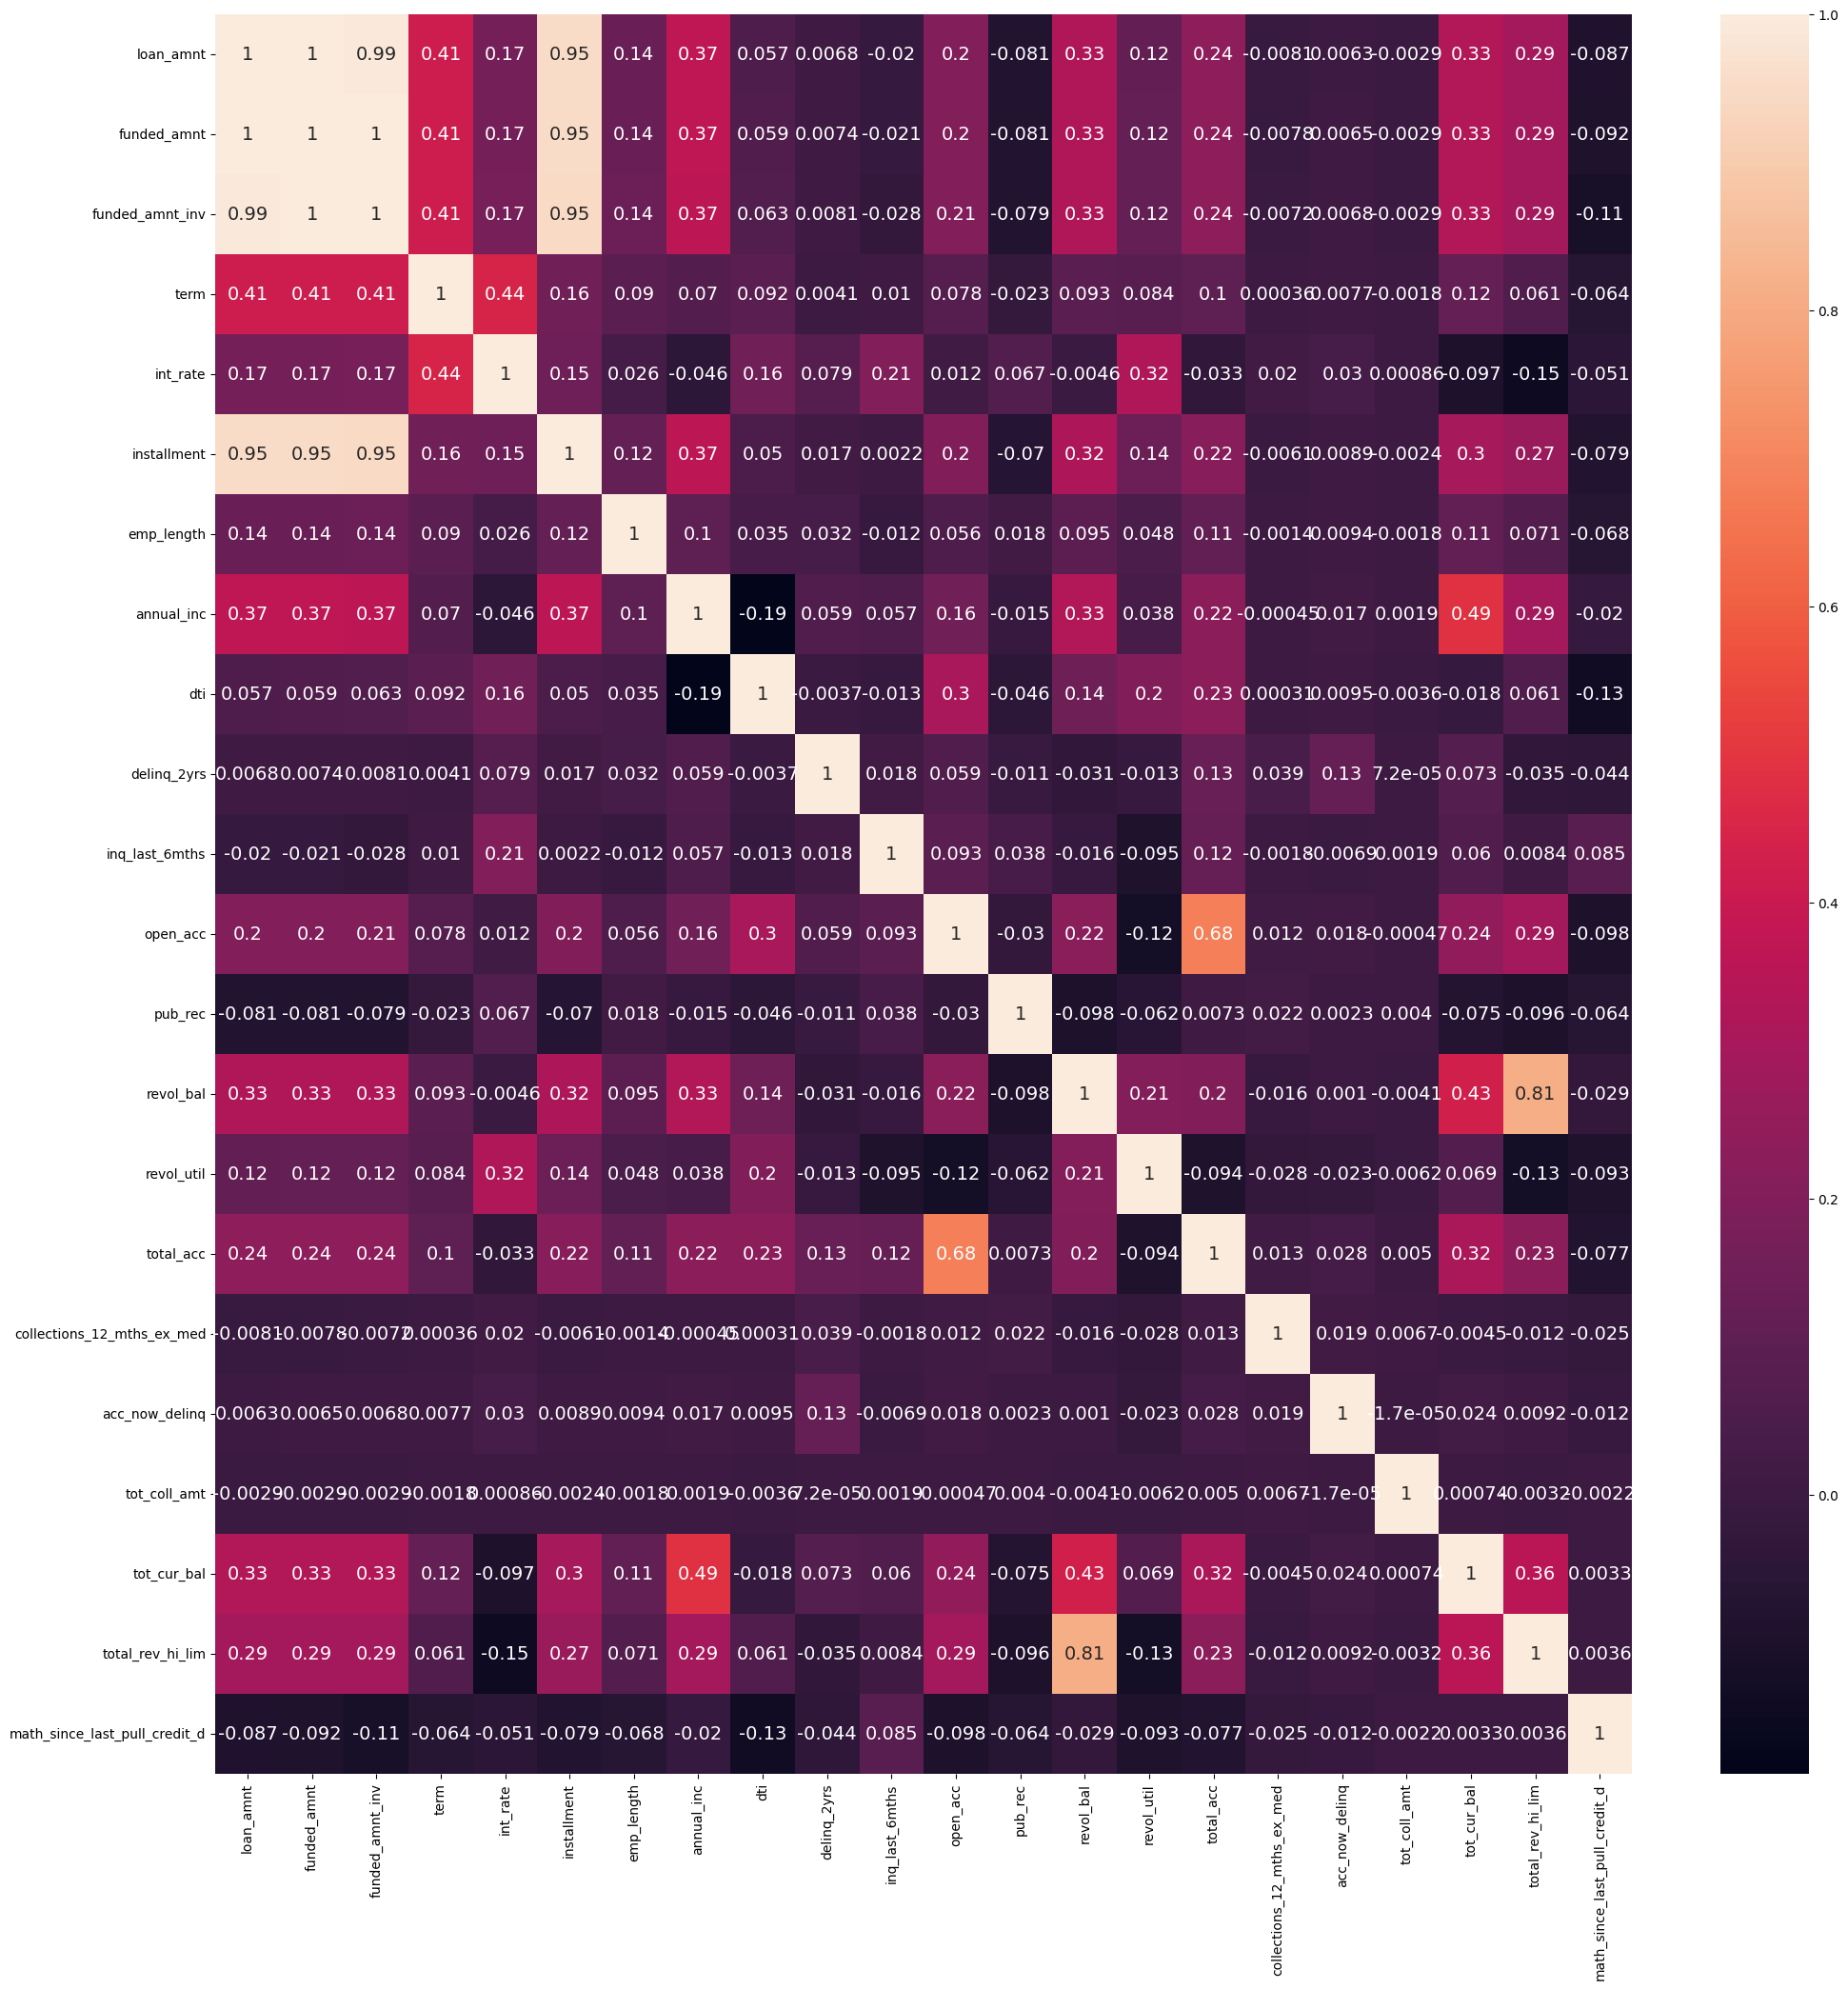

In [134]:
# we can see to in the plot of correlation among features too

plt.figure(figsize=(24,24))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':14})

In [135]:
# Based on these results, the three columns have similar data, so we can drop 2 columns.

df.drop(columns=['funded_amnt', 'funded_amnt_inv'], axis=1, inplace=True)

# Handling Missing Value

In [136]:
df.isnull().sum()

loan_amnt                            0
term                                 0
int_rate                             0
installment                          0
grade                                0
emp_length                           0
home_ownership                       0
annual_inc                           4
verification_status                  0
purpose                              0
addr_state                           0
dti                                  0
delinq_2yrs                         29
inq_last_6mths                      29
open_acc                            29
pub_rec                             29
revol_bal                            0
revol_util                         340
total_acc                           29
initial_list_status                  0
collections_12_mths_ex_med         145
acc_now_delinq                      29
tot_coll_amt                     70276
tot_cur_bal                      70276
total_rev_hi_lim                 70276
loan_ending              

In [137]:
# 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim' has 15% missing data. Lets check it

total=['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
df[total].head(10)

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [138]:
# Drop all rows that contaion missing value
df.dropna(subset=['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], inplace=True)
# Reset index
df.reset_index(drop=True, inplace=True)

In [139]:
# Check again NaN value
nan_count = df.isnull().sum()
nan_columns = nan_count[nan_count > 0].index

In [140]:
# Drop all rows that contaion missing value
df.dropna(subset=['revol_util', 'last_pull_credit_d_date', 'math_since_last_pull_credit_d'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Encoding

In [141]:
cols = [col for col in df.select_dtypes(include='object').columns.tolist()]
onehot = pd.get_dummies(df[cols], drop_first=True)
onehot

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,loan_ending_good
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395747,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
395748,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
395749,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
395750,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1


# Standardization
##### Standaridized all numeric columns with StandardScaler

In [142]:
num = [col for col in df.columns.tolist() if col not in cols + ['loan_ending'] and df[col].dtype != 'datetime64[ns]']
standard = StandardScaler()
standard_cols = pd.DataFrame(standard.fit_transform(df[num]), columns=num)
standard_cols

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,math_since_last_pull_credit_d
0,1.482304,-0.628491,-0.699136,1.806092,1.103805,-0.348727,0.652398,-0.369341,-0.748118,0.508318,-0.332152,0.958830,0.187852,0.126863,-0.090796,-0.06321,-0.013114,-0.157393,0.792477,-0.212004
1,-0.600985,-0.628491,-0.016194,-0.459992,-1.286439,-0.879789,0.938045,-0.369341,-0.748118,0.110318,-0.332152,-0.410989,-0.178076,0.213158,-0.090796,-0.06321,-0.013114,-0.819714,-0.410462,-0.403840
2,-0.330037,-0.628491,-1.697282,-0.315120,1.103805,0.566897,-0.467337,-0.369341,0.216912,0.110318,-0.332152,-0.162500,-1.537238,-0.304611,-0.090796,-0.06321,-0.013114,0.847567,0.824698,-0.403840
3,-0.330037,-0.628491,-0.118978,-0.155315,1.103805,-0.623415,-0.100439,-0.369341,-0.748118,-0.884682,3.344152,-0.525415,0.518930,0.558337,-0.090796,-0.06321,1.038208,-0.823121,-0.598421,-0.403840
4,0.031227,-0.628491,-1.176510,0.127372,-1.020856,-0.202228,-0.155030,-0.369341,-0.748118,-0.685682,-0.332152,-0.245489,0.754170,0.299453,-0.090796,-0.06321,0.090337,0.879436,-0.402406,-0.403840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395747,0.440659,1.591113,0.095727,-0.051759,-0.489691,0.658459,0.268997,-0.369341,1.181942,1.304317,-0.332152,0.317183,0.902284,0.903517,-0.090796,-0.06321,-0.013114,1.027446,-0.013062,-0.403840
395748,0.874176,1.591113,1.351975,0.563094,1.103805,0.072460,0.091261,-0.369341,4.077032,1.304317,1.506000,0.079730,-0.461235,0.385748,-0.090796,-0.06321,-0.013114,0.546260,0.242025,-0.403840
395749,0.717628,1.591113,0.671317,0.283444,0.307057,-0.513540,1.005330,-0.369341,1.181942,1.304317,-0.332152,-0.472096,-0.252133,1.507581,-0.090796,-0.06321,-0.013114,-0.428580,-0.464164,-0.212004
395750,-1.534250,-0.628491,-1.404919,-1.570017,-0.755273,0.164022,-1.566759,3.227268,0.216912,1.901317,-0.332152,-0.246779,-1.541595,0.126863,-0.090796,-0.06321,-0.013114,2.978099,0.609888,1.322686


# Final Data

In [143]:
final_data = pd.concat([onehot, standard_cols, df[['loan_ending']]], axis=1)
final_data.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,math_since_last_pull_credit_d,loan_ending
0,1,0,0,0,0,0,0,0,0,1,...,0.958830,0.187852,0.126863,-0.090796,-0.06321,-0.013114,-0.157393,0.792477,-0.212004,good
1,0,1,0,0,0,0,0,0,0,0,...,-0.410989,-0.178076,0.213158,-0.090796,-0.06321,-0.013114,-0.819714,-0.410462,-0.403840,good
2,0,0,0,0,0,0,1,0,0,0,...,-0.162500,-1.537238,-0.304611,-0.090796,-0.06321,-0.013114,0.847567,0.824698,-0.403840,good
3,1,0,0,0,0,0,0,0,0,0,...,-0.525415,0.518930,0.558337,-0.090796,-0.06321,1.038208,-0.823121,-0.598421,-0.403840,good
4,0,0,0,0,0,0,1,0,0,0,...,-0.245489,0.754170,0.299453,-0.090796,-0.06321,0.090337,0.879436,-0.402406,-0.403840,good


# Splitting Dataset
##### The data will be split into 80% for training and 20% fro test.

In [144]:
x = final_data.drop('loan_ending', axis=1)
y = final_data['loan_ending']

In [145]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [146]:
x_train.shape, x_test.shape

((316601, 96), (79151, 96))

<Axes: title={'center': 'Good and Bad Loans Balance'}>

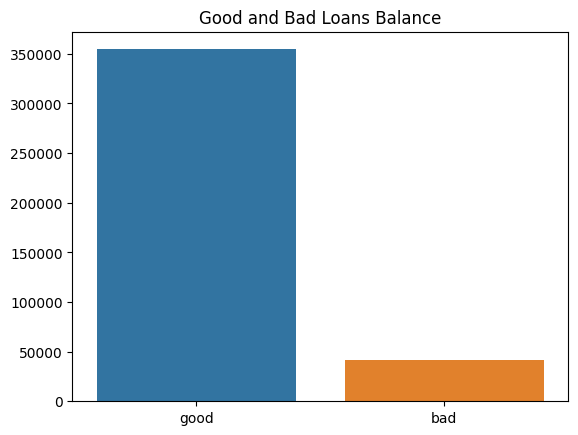

In [147]:
plt.title('Good and Bad Loans Balance')
sns.barplot(x=final_data.loan_ending.value_counts().index,y=final_data.loan_ending.value_counts().values)

In [148]:
y_train.value_counts()

good    283635
bad      32966
Name: loan_ending, dtype: int64

# RandomForest Classified

In [149]:
# training with test dataset
random_forest = RandomForestClassifier(max_depth=10, n_estimators=20)
random_forest.fit(x_train, y_train)

#predicting
y_pred_random_forest = random_forest.predict(x_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_random_forest, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     1.0000    0.9277    0.9625      8241
   good loan     0.9917    1.0000    0.9958     70910

    accuracy                         0.9925     79151
   macro avg     0.9958    0.9638    0.9791     79151
weighted avg     0.9925    0.9925    0.9923     79151



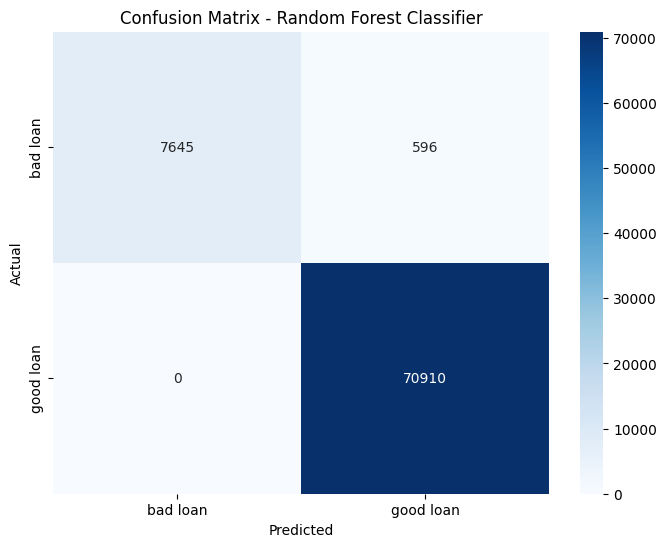

In [150]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_random_forest)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['bad loan', 'good loan'], yticklabels=['bad loan', 'good loan'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


ROC AUC Score: 1.0


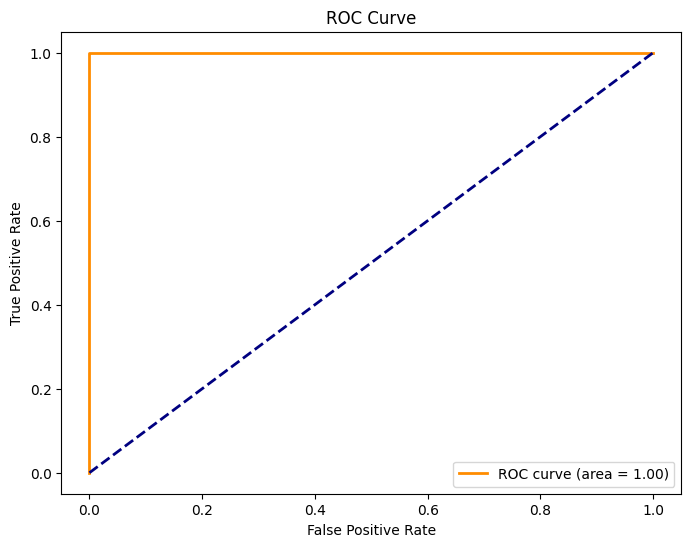

In [152]:
from sklearn.preprocessing import LabelBinarizer

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)

# use LabelBinarizer for change label to numerik
label_binarizer = LabelBinarizer()
y_test_numeric = label_binarizer.fit_transform(y_test)
y_probs = random_forest_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_probs)
roc_auc = auc(fpr, tpr)

# Print ROC AUC score
print('ROC AUC Score:', roc_auc)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [153]:
# Analisis terhadap false negatives
false_negatives = y_test[(y_test == 'bad loan') & (y_pred_random_forest == 'good loan')]
false_negatives_data = x_test.loc[false_negatives.index]
print(false_negatives_data.describe())


       grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
count      0.0      0.0      0.0      0.0      0.0      0.0   
mean       NaN      NaN      NaN      NaN      NaN      NaN   
std        NaN      NaN      NaN      NaN      NaN      NaN   
min        NaN      NaN      NaN      NaN      NaN      NaN   
25%        NaN      NaN      NaN      NaN      NaN      NaN   
50%        NaN      NaN      NaN      NaN      NaN      NaN   
75%        NaN      NaN      NaN      NaN      NaN      NaN   
max        NaN      NaN      NaN      NaN      NaN      NaN   

       home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
count                      0.0                  0.0                   0.0   
mean                       NaN                  NaN                   NaN   
std                        NaN                  NaN                   NaN   
min                        NaN                  NaN                   NaN   
25%                        NaN                 

In [154]:
cv_scores = cross_val_score(random_forest_model, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


##### Based on these result, the model shows excellent performance based on a high level of accuracy in precision, recall, and f1-score for both classes (bad_loan and good_loan) and have accuracy reaches 99%. Apart from that, ROC AUC has a score of **1.0** which shows the model's ability to differentiate between classes very well.

##### Apart from that, to identify whether the model predicted correctly or not, a false negative analysis was carried out with the results showing that there was no false negative data that could be analyzed so it can be said that the model very well identified bad loans.

##### The cross-validation value reaches 1.0, indicating that the model has consistent high performance in several data subsets.